## This script generates figure 6


In [1]:
import os
import pandas as pd
from pathlib import Path
import os
import pandas as pd

def collect_csv_files(root_dir, output_file):
    valid_file_names = [
        "BF-Online-Sharing-Oblivious-alpha", 
        "BF-Online-Sharing-Oblivious-beta",
        "BF-Online-Sharing-Oblivious-equal",
        "BFS-Online-Sharing-alpha",
        "BFS-Online-Sharing-beta",
        "BFS-Online-Sharing-equal",
        "BFS_Reallocation_alpha",
        "BFS_Reallocation_beta",
        "BFS_Reallocation_equal",
        "BFS_DataTransfer_alpha",
        "BFS_DataTransfer_beta",
        "BFS_DataTransfer_equal"
    ]

    # Initialize an empty DataFrame
    combined_df = pd.DataFrame()

    for path, subdirs, files in os.walk(root_dir):
        for name in files:
            if name.replace('.csv', '') in valid_file_names:
                file_path = os.path.join(path, name)
                parent_folder = Path(file_path).parent.name  # Category
                grandparent_folder = Path(file_path).parent.parent.name

                df = pd.read_csv(file_path, header=None)
                df.columns = [f"{grandparent_folder}_{name.replace('.csv', '')}_{col}" for col in range(2)]
                df['Category'] = parent_folder

                combined_df = pd.concat([combined_df, df], ignore_index=True)

    # Save the combined dataframe
    combined_df.to_csv(output_file, index=False)
    return combined_df

# Usage
root_directory = r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC'  # Replace with your folder path
output_csv_file = os.path.join(root_directory, 'combined_data3_new.csv')  # Output file in root directory
df = collect_csv_files(root_directory, output_csv_file)


In [2]:
def consolidate_dataframe(df, output_file_path):

    # Grouping the dataframe by 'Category' and then applying a function to 'compact' the non-null values in each column
    consolidated_df = df.groupby('Category').apply(lambda x: x.apply(lambda y: pd.Series(y.dropna().values)))

    # Resetting the index
    consolidated_df.reset_index(drop=True, inplace=True)

    # Save the transformed dataframe to a new CSV file
    consolidated_df.to_csv(output_file_path, index=False)
    return(consolidated_df) 

# Specify the directory and file paths
#root_directory = r'C:\Users\mohse\Documents\Result_TCC'  # Replace with your folder path
input_csv_file = os.path.join(root_directory, 'combined_data3_new.csv')  # Specify your input file name
output_csv_file = os.path.join(root_directory, 'combined_data_consolidate3_new.csv')  # Output file in root directory

# Call the function with the file paths
df_1 = consolidate_dataframe(df, output_csv_file)


In [3]:
def group_by_category_and_find_max(df,output_file_path):
    # Grouping by 'Category' and finding the maximum value in each column for each group
    max_values_df = df.groupby('Category').max()

    # Save the results to a new CSV file
    max_values_df.to_csv(output_file_path)
    return max_values_df

# Specify the directory and file paths
#root_directory = r'C:\Users\mohse\Documents\Result_TCC'  # Replace with your folder path
input_csv_file = os.path.join(root_directory, 'combined_data_new.csv')  # Specify your input file name
output_csv_file_max_data3 = os.path.join(root_directory, 'combined_data_max3_new.csv')  # Output file in root directory

# Call the function with the file paths
max_values_df=group_by_category_and_find_max(df_1, output_csv_file_max_data3)

## Below script is for sharing and non-sharing case

In [4]:
df = max_values_df.copy()
columns_to_sum_BFS_alpha = [
    '500-1_BFS-Online-Sharing-alpha_1', 
    '500-2_BFS-Online-Sharing-alpha_1', 
    '500-3_BFS-Online-Sharing-alpha_1'
]
df['sum_BFS_alpha'] = df[columns_to_sum_BFS_alpha].sum(axis=1)
df['avg_BFS_alpha'] = df[columns_to_sum_BFS_alpha].sum(axis=1)/3
df['std_BFS_alpha'] = df[columns_to_sum_BFS_alpha].std(axis=1)

columns_to_sum_BFS_beta = [
     '500-1_BFS-Online-Sharing-beta_1', 
    '500-2_BFS-Online-Sharing-beta_1', 
    '500-3_BFS-Online-Sharing-beta_1'
]
df['sum_BFS_beta'] = df[columns_to_sum_BFS_beta].sum(axis=1)
df['avg_BFS_beta'] = df[columns_to_sum_BFS_beta].sum(axis=1)/3
df['std_BFS_beta'] = df[columns_to_sum_BFS_beta].std(axis=1)

columns_to_sum_BFS_equal = [
     '500-1_BFS-Online-Sharing-equal_1', 
    '500-2_BFS-Online-Sharing-equal_1', 
    '500-3_BFS-Online-Sharing-equal_1'
]
df['sum_BFS_equal'] = df[columns_to_sum_BFS_equal].sum(axis=1)
df['avg_BFS_equal'] = df[columns_to_sum_BFS_equal].sum(axis=1)/3
df['std_BFS_equal'] = df[columns_to_sum_BFS_equal].std(axis=1)

#################################################################################

columns_to_sum_BF_alpha = [
    '500-1_BF-Online-Sharing-Oblivious-alpha_1',
    '500-2_BF-Online-Sharing-Oblivious-alpha_1', 
    '500-3_BF-Online-Sharing-Oblivious-alpha_1'
]
df['sum_BF_alpha'] = df[columns_to_sum_BF_alpha].sum(axis=1)



columns_to_sum_BF_beta = [
    '500-1_BF-Online-Sharing-Oblivious-beta_1',
    '500-2_BF-Online-Sharing-Oblivious-beta_1', 
    '500-3_BF-Online-Sharing-Oblivious-beta_1'
]
df['sum_BF_beta'] = df[columns_to_sum_BF_beta].sum(axis=1)



columns_to_sum_BF_equal = [
    '500-1_BF-Online-Sharing-Oblivious-equal_1',
    '500-2_BF-Online-Sharing-Oblivious-equal_1', 
    '500-3_BF-Online-Sharing-Oblivious-equal_1'
]
df['sum_BF_equal'] = df[columns_to_sum_BF_equal].sum(axis=1)


df['x_over_y_BF_alpha'] = df['sum_BFS_alpha']/df['sum_BF_alpha']
df['x_over_y_BF_beta'] = df['sum_BFS_beta']/df['sum_BF_beta']
df['x_over_y_BF_equal'] = df['sum_BFS_equal']/df['sum_BF_equal']
#####
df['t1_BF_alpha'] = (df['500-1_BF-Online-Sharing-Oblivious-alpha_1']-df['500-1_BFS-Online-Sharing-alpha_1'])/df['500-1_BF-Online-Sharing-Oblivious-alpha_1']
df['t2_BF_alpha'] = (df['500-2_BF-Online-Sharing-Oblivious-alpha_1']-df['500-2_BFS-Online-Sharing-alpha_1'])/df['500-2_BF-Online-Sharing-Oblivious-alpha_1']
df['t3_BF_alpha'] = (df['500-3_BF-Online-Sharing-Oblivious-alpha_1']-df['500-3_BFS-Online-Sharing-alpha_1'])/df['500-3_BF-Online-Sharing-Oblivious-alpha_1']

columns_to_sum_t_BF_alpha = ['t1_BF_alpha','t2_BF_alpha','t3_BF_alpha']
df['t_avg_BF_alpha'] = (df[columns_to_sum_t_BF_alpha].sum(axis=1))/3
df['t_std_BF_alpha'] = df[columns_to_sum_t_BF_alpha].std(axis=1)
######

df['t1_BF_beta'] = (df['500-1_BF-Online-Sharing-Oblivious-beta_1']-df['500-1_BFS-Online-Sharing-beta_1'])/df['500-1_BF-Online-Sharing-Oblivious-beta_1']
df['t2_BF_beta'] = (df['500-2_BF-Online-Sharing-Oblivious-beta_1']-df['500-2_BFS-Online-Sharing-beta_1'])/df['500-2_BF-Online-Sharing-Oblivious-beta_1']
df['t3_BF_beta'] = (df['500-3_BF-Online-Sharing-Oblivious-beta_1']-df['500-3_BFS-Online-Sharing-beta_1'])/df['500-3_BF-Online-Sharing-Oblivious-beta_1']

columns_to_sum_t_BF_beta = ['t1_BF_beta','t2_BF_beta','t3_BF_beta']
df['t_avg_BF_beta'] = (df[columns_to_sum_t_BF_beta].sum(axis=1))/3
df['t_std_BF_beta'] = df[columns_to_sum_t_BF_beta].std(axis=1)


df['t1_BF_equal'] = (df['500-1_BF-Online-Sharing-Oblivious-equal_1']-df['500-1_BFS-Online-Sharing-equal_1'])/df['500-1_BF-Online-Sharing-Oblivious-equal_1']
df['t2_BF_equal'] = (df['500-2_BF-Online-Sharing-Oblivious-equal_1']-df['500-2_BFS-Online-Sharing-equal_1'])/df['500-2_BF-Online-Sharing-Oblivious-equal_1']
df['t3_BF_equal'] = (df['500-3_BF-Online-Sharing-Oblivious-equal_1']-df['500-3_BFS-Online-Sharing-equal_1'])/df['500-3_BF-Online-Sharing-Oblivious-equal_1']

columns_to_sum_t_BF_equal = ['t1_BF_equal','t2_BF_equal','t3_BF_equal']
df['t_avg_BF_equal'] = (df[columns_to_sum_t_BF_equal].sum(axis=1))/3
df['t_std_BF_equal'] = df[columns_to_sum_t_BF_equal].std(axis=1)

In [5]:
output_csv_file_sharing3_new = os.path.join(root_directory, 'combined_data_test_sharing3_new.csv')
df.to_csv(output_csv_file_sharing3_new)

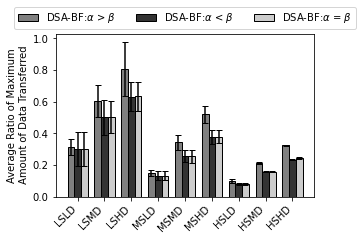

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv(output_csv_file_sharing3_new)  # Ensure that df is defined and loaded with your dataset

# Replace category names with abbreviations
category_abbreviations = {
    '1.low-sharing-low-demand': 'LSLD',
    '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD',
    '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD',
    '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD',
    '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
data['Category'] = data['Category'].map(category_abbreviations)

# Data for bar chart and error bars, reordered as per your request
x_over_y_columns = ['x_over_y_BF_alpha', 'x_over_y_BF_beta', 'x_over_y_BF_equal']
std_dev_columns = ['t_std_BF_alpha', 't_std_BF_beta', 't_std_BF_equal']
x_over_y_labels = ['BF-alpha', 'BF-beta', 'BF-equal']  # New order of labels
legend_labels = [r'DSA-BF:$\alpha$ > $\beta$', r'DSA-BF:$\alpha$ < $\beta$', r'DSA-BF:$\alpha$ = $\beta$']

# The x position of bars
barWidth = 0.25
r1 = np.arange(len(data['Category']))

# Set color for grayscale by varying the lightness between 0 and 1
colors = ['0.5', '0.2', '0.8']  # Colors ordered to match the new bar order

# Create the figure and the axes with a specific figure size
plt.figure(figsize=(5, 3.5))

# Add bars for each column
for i, (x_over_y_col, std_dev_col, color, label) in enumerate(zip(x_over_y_columns, std_dev_columns, colors, legend_labels)):
    r = [x + (barWidth * i) for x in r1]
    plt.bar(r, data[x_over_y_col], width=barWidth, color=color, edgecolor='black', yerr=data[std_dev_col], capsize=3, label=label)

# Add xticks on the middle of the group bars
# plt.xlabel('Category', fontweight='bold')
plt.xticks([r + barWidth for r in r1], data['Category'].values, rotation=45, ha='right')

# Y-axis label
plt.ylabel('Average Ratio of Maximum\n Amount of Data Transferred')

# Create legend and place it at the top right without overlapping with the data
#plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), frameon=True, shadow=False, ncol=3)

# Adjust the bottom margin to prevent cutting off tick labels
plt.subplots_adjust(bottom=0.15)

# Show the plot
plt.tight_layout()
#root_directory = r'C:\Users\mohse\Documents\Result-Final'  # Replace with your folder path
output_csv_file_fig5_sharing = os.path.join(root_directory, 'fig5_sharing_new.csv')
df.to_csv(output_csv_file_fig5_sharing)
plt.savefig(r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\BF_relative_max_data_new.pdf', dpi=300)
plt.show()


## Below script is for data transfer and realloation case

In [7]:
df = max_values_df.copy()
columns_to_sum_BFS_dataTransfer_alpha = [
    '500-1_BFS_DataTransfer_alpha_1', 
    '500-2_BFS_DataTransfer_alpha_1', 
    '500-3_BFS_DataTransfer_alpha_1'
]
df['sum_BFS_dataTransfer_alpha'] = df[columns_to_sum_BFS_dataTransfer_alpha].sum(axis=1)
df['avg_BFS_dataTransfer_alpha'] = (df[columns_to_sum_BFS_dataTransfer_alpha].sum(axis=1))/3
df['std_avg_BFS_dataTransfer_alpha'] = df[columns_to_sum_BFS_dataTransfer_alpha].std(axis=1)


columns_to_sum_BFS_dataTransfer_beta = [
    '500-1_BFS_DataTransfer_beta_1',
    '500-2_BFS_DataTransfer_beta_1',
    '500-3_BFS_DataTransfer_beta_1'
]
df['sum_BFS_dataTransfer_beta'] = df[columns_to_sum_BFS_dataTransfer_beta].sum(axis=1)
df['avg_BFS_dataTransfer_beta'] = (df[columns_to_sum_BFS_dataTransfer_beta].sum(axis=1))/3
df['std_avg_BFS_dataTransfer_beta'] = df[columns_to_sum_BFS_dataTransfer_beta].std(axis=1)


columns_to_sum_BFS_dataTransfer_equal = [
     '500-1_BFS_DataTransfer_equal_1',
     '500-2_BFS_DataTransfer_equal_1',
     '500-3_BFS_DataTransfer_equal_1'
]
df['sum_BFS_dataTransfer_equal'] = df[columns_to_sum_BFS_dataTransfer_equal].sum(axis=1)
df['avg_BFS_dataTransfer_equal'] = (df[columns_to_sum_BFS_dataTransfer_equal].sum(axis=1))/3
df['std_avg_BFS_dataTransfer_equal'] = df[columns_to_sum_BFS_dataTransfer_equal].std(axis=1)




###############################################################################

columns_to_sum_BFS_reallocation_alpha = [
    '500-1_BFS_Reallocation_alpha_1', 
    '500-2_BFS_Reallocation_alpha_1', 
    '500-3_BFS_Reallocation_alpha_1'
]
df['sum_BFS_reallocation_alpha'] = df[columns_to_sum_BFS_reallocation_alpha].sum(axis=1)


columns_to_sum_BFS_reallocation_beta = [
    '500-1_BFS_Reallocation_beta_1',
    '500-2_BFS_Reallocation_beta_1',
    '500-3_BFS_Reallocation_beta_1'
]
df['sum_BFS_reallocation_beta'] = df[columns_to_sum_BFS_reallocation_beta].sum(axis=1)



columns_to_sum_BFS_reallocation_equal = [
     '500-1_BFS_Reallocation_equal_1',
     '500-2_BFS_Reallocation_equal_1',
     '500-3_BFS_Reallocation_equal_1'
]
df['sum_BFS_reallocation_equal'] = df[columns_to_sum_BFS_reallocation_equal].sum(axis=1)



#################################################################################

df['x_over_y_BF_dataTransfer_alpha'] = df['sum_BFS_dataTransfer_alpha']/df['sum_BFS_reallocation_alpha']
df['x_over_y_BF_dataTransfer_beta'] = df['sum_BFS_dataTransfer_beta']/df['sum_BFS_reallocation_beta']
df['x_over_y_BF_dataTransfer_equal'] = df['sum_BFS_dataTransfer_equal']/df['sum_BFS_reallocation_equal']

########################
df['t1_BF_dataTransfer_alpha'] = (df['500-1_BFS_Reallocation_alpha_1']-df['500-1_BFS_DataTransfer_alpha_1'])/df['500-1_BFS_Reallocation_alpha_1']
df['t2_BF_dataTransfer_alpha'] = (df['500-2_BFS_Reallocation_alpha_1']-df['500-2_BFS_DataTransfer_alpha_1'])/df['500-2_BFS_Reallocation_alpha_1']
df['t3_BF_dataTransfer_alpha'] = (df['500-3_BFS_Reallocation_alpha_1']-df['500-3_BFS_DataTransfer_alpha_1'])/df['500-3_BFS_Reallocation_alpha_1']

columns_to_sum_t_BF_dataTransfer_alpha = ['t1_BF_dataTransfer_alpha','t2_BF_dataTransfer_alpha','t3_BF_dataTransfer_alpha']
df['t_avg_BF_dataTransfer_alpha'] = (df[columns_to_sum_t_BF_dataTransfer_alpha].sum(axis=1))/3
df['t_std_BF_dataTransfer_alpha'] = df[columns_to_sum_t_BF_dataTransfer_alpha].std(axis=1)

#######################
df['t1_BF_dataTransfer_beta'] = (df['500-1_BFS_Reallocation_beta_1']-df['500-1_BFS_DataTransfer_beta_1'])/df['500-1_BFS_Reallocation_beta_1']
df['t2_BF_dataTransfer_beta'] = (df['500-2_BFS_Reallocation_beta_1']-df['500-2_BFS_DataTransfer_beta_1'])/df['500-2_BFS_Reallocation_beta_1']
df['t3_BF_dataTransfer_beta'] = (df['500-3_BFS_Reallocation_beta_1']-df['500-3_BFS_DataTransfer_beta_1'])/df['500-3_BFS_Reallocation_beta_1']

columns_to_sum_t_BF_dataTransfer_beta = ['t1_BF_dataTransfer_beta','t2_BF_dataTransfer_beta','t3_BF_dataTransfer_beta']
df['t_avg_BF_dataTransfer_beta'] = (df[columns_to_sum_t_BF_dataTransfer_beta].sum(axis=1))/3
df['t_std_BF_dataTransfer_beta'] = df[columns_to_sum_t_BF_dataTransfer_beta].std(axis=1)

#####################
df['t1_BF_dataTransfer_equal'] = (df['500-1_BFS_Reallocation_equal_1']-df['500-1_BFS_DataTransfer_equal_1'])/df['500-1_BFS_Reallocation_equal_1']
df['t2_BF_dataTransfer_equal'] = (df['500-2_BFS_Reallocation_equal_1']-df['500-2_BFS_DataTransfer_equal_1'])/df['500-2_BFS_Reallocation_equal_1']
df['t3_BF_dataTransfer_equal'] = (df['500-3_BFS_Reallocation_equal_1']-df['500-3_BFS_DataTransfer_equal_1'])/df['500-3_BFS_Reallocation_equal_1']

columns_to_sum_t_BF_dataTransfer_equal = ['t1_BF_dataTransfer_equal','t2_BF_dataTransfer_equal','t3_BF_dataTransfer_equal']
df['t_avg_BF_dataTransfer_equal'] = (df[columns_to_sum_t_BF_dataTransfer_equal].sum(axis=1))/3
df['t_std_BF_dataTransfer_equal'] = df[columns_to_sum_t_BF_dataTransfer_equal].std(axis=1)

In [8]:
output_csv_file_sharing4_fig6 = os.path.join(root_directory, 'combined_data_test_sharing4_fig6.csv')
df.to_csv(output_csv_file_sharing4_fig6)

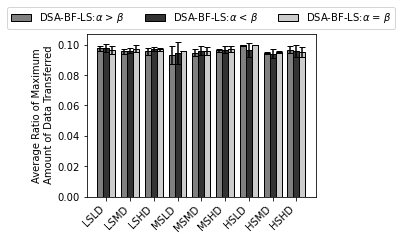

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv(output_csv_file_sharing4_fig6)  # Ensure that df is defined and loaded with your dataset

# Replace category names with abbreviations
category_abbreviations = {
    '1.low-sharing-low-demand': 'LSLD',
    '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD',
    '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD',
    '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD',
    '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
data['Category'] = data['Category'].map(category_abbreviations)

# Data for bar chart and error bars, reordered as per your request
x_over_y_columns = ['x_over_y_BF_dataTransfer_alpha', 'x_over_y_BF_dataTransfer_beta', 'x_over_y_BF_dataTransfer_equal']
std_dev_columns = ['t_std_BF_dataTransfer_alpha', 't_std_BF_dataTransfer_beta', 't_std_BF_dataTransfer_equal']
x_over_y_labels = ['BF-alpha', 'BF-beta', 'BF-equal']  # New order of labels
legend_labels = [r'DSA-BF-LS:$\alpha$ > $\beta$', r'DSA-BF-LS:$\alpha$ < $\beta$', r'DSA-BF-LS:$\alpha$ = $\beta$']

# The x position of bars
barWidth = 0.25
r1 = np.arange(len(data['Category']))

# Set color for grayscale by varying the lightness between 0 and 1
colors = ['0.5', '0.2', '0.8']  # Colors ordered to match the new bar order

# Create the figure and the axes with a specific figure size
plt.figure(figsize=(5, 3.5))

# Add bars for each column
for i, (x_over_y_col, std_dev_col, color, label) in enumerate(zip(x_over_y_columns, std_dev_columns, colors, legend_labels)):
    r = [x + (barWidth * i) for x in r1]
    plt.bar(r, data[x_over_y_col], width=barWidth, color=color, edgecolor='black', yerr=data[std_dev_col], capsize=3, label=label)

# Add xticks on the middle of the group bars
# plt.xlabel('Category', fontweight='bold')
plt.xticks([r + barWidth for r in r1], data['Category'].values, rotation=45, ha='right')

# Y-axis label
plt.ylabel('Average Ratio of Maximum\n Amount of Data Transferred')

# Create legend and place it at the top right without overlapping with the data
#plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), frameon=True, shadow=False, ncol=3)

# Adjust the bottom margin to prevent cutting off tick labels
plt.subplots_adjust(bottom=0.15)

# Show the plot
plt.tight_layout()
#root_directory = r'C:\Users\mohse\Documents\Result-Final'  # Replace with your folder path
output_csv_file_fig5_sharing = os.path.join(root_directory, 'fig5_sharing_new.csv')
df.to_csv(output_csv_file_fig5_sharing)
plt.savefig(r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\BF_relative_max_data_transfer_new.pdf', dpi=300)
plt.show()

## Below script is for figure 6

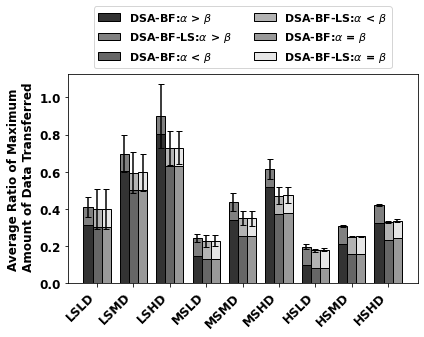

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# === LOAD CSV FILES ===
root_directory = r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC'
df_realloc = pd.read_csv(os.path.join(root_directory, 'combined_data_test_sharing3_new.csv'))
df_transfer = pd.read_csv(os.path.join(root_directory, 'combined_data_test_sharing4_fig6.csv'))

# === CATEGORY LABELS ===
category_abbreviations = {
    '1.low-sharing-low-demand': 'LSLD', '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD', '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD', '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD', '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
df_realloc['Category'] = df_realloc['Category'].map(category_abbreviations)
df_transfer['Category'] = df_transfer['Category'].map(category_abbreviations)

# === COLUMNS ===
base_cols = [
    'x_over_y_BF_alpha',
    'x_over_y_BF_beta',
    'x_over_y_BF_equal'
]
base_errs = [
    't_std_BF_alpha',
    't_std_BF_beta',
    't_std_BF_equal'
]
ovr_cols = [
    'x_over_y_BF_dataTransfer_alpha',
    'x_over_y_BF_dataTransfer_beta',
    'x_over_y_BF_dataTransfer_equal'
]
ovr_errs = [
    't_std_BF_dataTransfer_alpha',
    't_std_BF_dataTransfer_beta',
    't_std_BF_dataTransfer_equal'
]

labels_base = [r'DSA-BF:$\alpha$ > $\beta$', r'DSA-BF:$\alpha$ < $\beta$', r'DSA-BF:$\alpha$ = $\beta$']
labels_ovr  = [r'DSA-BF-LS:$\alpha$ > $\beta$', r'DSA-BF-LS:$\alpha$ < $\beta$', r'DSA-BF-LS:$\alpha$ = $\beta$']

colors_base = ['0.2', '0.4', '0.6']  # Darker gray
colors_ovr  = ['0.5', '0.7', '0.9']  # Lighter gray

# === PLOT SETTINGS ===
x = np.arange(len(df_realloc['Category']))
bar_width = 0.25

plt.figure(figsize=(6, 5))

for i, (bcol, berr, ocol, oerr, lbl_b, lbl_o, col_b, col_o) in enumerate(zip(
    base_cols, base_errs, ovr_cols, ovr_errs,
    labels_base, labels_ovr, colors_base, colors_ovr
)):
    xi = x + i * bar_width

    # Base bar (reallocation)
    plt.bar(xi,
            df_realloc[bcol],
            width=bar_width,
            color=col_b,
            edgecolor='black',
            label=lbl_b)

    # Combined std deviation
    combined_std = np.sqrt(df_realloc[berr].values**2 + df_transfer[oerr].values**2)

    # Overlay bar (data transfer), stacked with combined error bar
    plt.bar(xi,
            df_transfer[ocol],
            width=bar_width,
            bottom=df_realloc[bcol].values,
            color=col_o,
            edgecolor='black',
            yerr=combined_std,
            capsize=3,
            zorder=3,
            label=lbl_o)

# === LABELS, TICKS, LEGEND ===
plt.xticks(x + bar_width, df_realloc['Category'], rotation=45, ha='right', fontweight='bold', fontsize=12)
plt.ylabel('Average Ratio of Maximum\n Amount of Data Transferred', fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)

# Legend (6 items)
plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, 1.35),
           frameon=True,
           shadow=False,
           ncol=2,
           prop={'weight': 'bold', 'size': 11})

plt.subplots_adjust(bottom=0.18)
plt.tight_layout()

# === SAVE OUTPUT ===
output_csv_file_fig5_sharing = os.path.join(root_directory, 'fig6_sharing_new.csv')
df.to_csv(output_csv_file_fig5_sharing)
plt.savefig(r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\figure6_combined_legend.pdf', dpi=300)
plt.show()


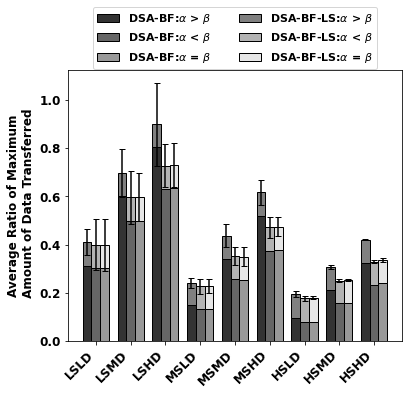

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.patches import Patch

# === LOAD CSV FILES ===
root_directory = r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC'
df_realloc = pd.read_csv(os.path.join(root_directory, 'combined_data_test_sharing3_new.csv'))
df_transfer = pd.read_csv(os.path.join(root_directory, 'combined_data_test_sharing4_fig6.csv'))

# === CATEGORY LABELS ===
category_abbreviations = {
    '1.low-sharing-low-demand': 'LSLD', '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD', '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD', '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD', '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
df_realloc['Category'] = df_realloc['Category'].map(category_abbreviations)
df_transfer['Category'] = df_transfer['Category'].map(category_abbreviations)

# === COLUMNS ===
base_cols = ['x_over_y_BF_alpha', 'x_over_y_BF_beta', 'x_over_y_BF_equal']
base_errs = ['t_std_BF_alpha', 't_std_BF_beta', 't_std_BF_equal']
ovr_cols  = ['x_over_y_BF_dataTransfer_alpha', 'x_over_y_BF_dataTransfer_beta', 'x_over_y_BF_dataTransfer_equal']
ovr_errs  = ['t_std_BF_dataTransfer_alpha', 't_std_BF_dataTransfer_beta', 't_std_BF_dataTransfer_equal']

# === LABELS & COLORS ===
labels_base = [r'DSA-BF:$\alpha$ > $\beta$', r'DSA-BF:$\alpha$ < $\beta$', r'DSA-BF:$\alpha$ = $\beta$']
labels_ovr  = [r'DSA-BF-LS:$\alpha$ > $\beta$', r'DSA-BF-LS:$\alpha$ < $\beta$', r'DSA-BF-LS:$\alpha$ = $\beta$']
colors_base = ['0.2', '0.4', '0.6']  # Grayscale for base
colors_ovr  = ['0.5', '0.7', '0.9']  # Grayscale for overlay

# === PLOT CONFIG ===
x = np.arange(len(df_realloc['Category']))
bar_width = 0.25
plt.figure(figsize=(6, 5))

# === PLOT STACKED BARS ===
for i, (bcol, berr, ocol, oerr, col_b, col_o) in enumerate(zip(
    base_cols, base_errs, ovr_cols, ovr_errs, colors_base, colors_ovr
)):
    xi = x + i * bar_width

    # Bottom (base) bar: reallocation
    plt.bar(xi,
            df_realloc[bcol],
            width=bar_width,
            color=col_b,
            edgecolor='black')

    # Top (overlay) bar: data transfer
    combined_std = np.sqrt(df_realloc[berr].values**2 + df_transfer[oerr].values**2)

    plt.bar(xi,
            df_transfer[ocol],
            width=bar_width,
            bottom=df_realloc[bcol].values,
            color=col_o,
            edgecolor='black',
            yerr=combined_std,
            capsize=3,
            zorder=3)

# === AXIS LABELS ===
plt.xticks(x + bar_width, df_realloc['Category'], rotation=45, ha='right', fontweight='bold', fontsize=12)
plt.ylabel('Average Ratio of Maximum\n Amount of Data Transferred', fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)

# === CONSOLIDATED LEGEND ===
legend_handles = [
    Patch(facecolor='0.2', edgecolor='black', label=r'DSA-BF:$\alpha$ > $\beta$'),
    Patch(facecolor='0.4', edgecolor='black', label=r'DSA-BF:$\alpha$ < $\beta$'),
    Patch(facecolor='0.6', edgecolor='black', label=r'DSA-BF:$\alpha$ = $\beta$'),
    Patch(facecolor='0.5', edgecolor='black', label=r'DSA-BF-LS:$\alpha$ > $\beta$'),
    Patch(facecolor='0.7', edgecolor='black', label=r'DSA-BF-LS:$\alpha$ < $\beta$'),
    Patch(facecolor='0.9', edgecolor='black', label=r'DSA-BF-LS:$\alpha$ = $\beta$'),
]

plt.legend(legend_handles,
           [h.get_label() for h in legend_handles],
           loc='upper center',
           bbox_to_anchor=(0.5, 1.25),
           frameon=True,
           ncol=2,
           columnspacing=2.5,
           handletextpad=0.8,
           prop={'weight': 'bold', 'size': 11})

# === FINALIZE ===
output_csv_file_fig5_sharing = os.path.join(root_directory, 'fig6_sharing_new.csv')
df.to_csv(output_csv_file_fig5_sharing)
plt.savefig(r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\final_result_figure6.pdf', dpi=300, bbox_inches='tight')
plt.show()



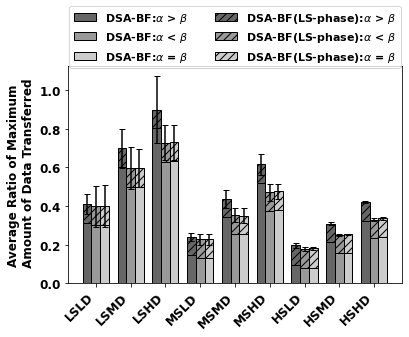

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.patches import Patch

# === LOAD CSV FILES ===
root_directory = r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC'
df_realloc = pd.read_csv(os.path.join(root_directory, 'combined_data_test_sharing3_new.csv'))
df_transfer = pd.read_csv(os.path.join(root_directory, 'combined_data_test_sharing4_fig6.csv'))

# === CATEGORY LABELS ===
category_abbreviations = {
    '1.low-sharing-low-demand': 'LSLD', '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD', '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD', '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD', '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
df_realloc['Category'] = df_realloc['Category'].map(category_abbreviations)
df_transfer['Category'] = df_transfer['Category'].map(category_abbreviations)

# === COLUMNS ===
base_cols = ['x_over_y_BF_alpha', 'x_over_y_BF_beta', 'x_over_y_BF_equal']
base_errs = ['t_std_BF_alpha', 't_std_BF_beta', 't_std_BF_equal']
ovr_cols  = ['x_over_y_BF_dataTransfer_alpha', 'x_over_y_BF_dataTransfer_beta', 'x_over_y_BF_dataTransfer_equal']
ovr_errs  = ['t_std_BF_dataTransfer_alpha', 't_std_BF_dataTransfer_beta', 't_std_BF_dataTransfer_equal']

# === LABELS & COLORS ===
labels_base = [r'DSA-BF:$\alpha$ > $\beta$', r'DSA-BF:$\alpha$ < $\beta$', r'DSA-BF:$\alpha$ = $\beta$']
labels_ovr  = [r'DSA-BF(LS-phase):$\alpha$ > $\beta$', r'DSA-BF(LS-phase):$\alpha$ < $\beta$', r'DSA-BF(LS-phase):$\alpha$ = $\beta$']
colors_base = ['0.4', '0.6', '0.8']
hatch_patterns = ['///', '///', '///']

# === PLOT CONFIG ===
x = np.arange(len(df_realloc['Category']))
bar_width = 0.25
plt.figure(figsize=(6, 4))

# === PLOT STACKED BARS ===
for i, (bcol, berr, ocol, oerr, col_b, hatch) in enumerate(zip(
    base_cols, base_errs, ovr_cols, ovr_errs, colors_base, hatch_patterns
)):
    xi = x + i * bar_width

    # Bottom bar (base)
    plt.bar(xi,
            df_realloc[bcol],
            width=bar_width,
            color=col_b,
            edgecolor='black')

    # Top bar (overlay)
    combined_std = np.sqrt(df_realloc[berr].values**2 + df_transfer[oerr].values**2)

    plt.bar(xi,
            df_transfer[ocol],
            width=bar_width,
            bottom=df_realloc[bcol].values,
            color=col_b,
            hatch=hatch,
            edgecolor='black',
            yerr=combined_std,
            capsize=3,
            zorder=3)

# === AXIS LABELS ===
plt.xticks(x + bar_width, df_realloc['Category'], rotation=45, ha='right', fontweight='bold', fontsize=12)
plt.ylabel('Average Ratio of Maximum\n Amount of Data Transferred', fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)

# === LEGEND (2 aligned columns: base and overlay) ===
legend_handles = []
for i in range(len(labels_base)):
    base_patch = Patch(facecolor=colors_base[i], edgecolor='black', label=labels_base[i])
    overlay_patch = Patch(facecolor=colors_base[i], edgecolor='black', hatch=hatch_patterns[i], label=labels_ovr[i])
    legend_handles.append((base_patch, overlay_patch))

# Flatten for 2-column legend
handles_col1 = [pair[0] for pair in legend_handles]
handles_col2 = [pair[1] for pair in legend_handles]
combined_handles = handles_col1 + handles_col2
combined_labels = labels_base + labels_ovr

plt.legend(combined_handles,
           combined_labels,
           loc='upper center',
           bbox_to_anchor=(0.5, 1.3),
           frameon=True,
           ncol=2,
           columnspacing=2.5,
           handletextpad=0.8,
           prop={'weight': 'bold', 'size': 11})

# === FINALIZE ===
output_csv_file_fig5_sharing = os.path.join(root_directory, 'fig6_sharing_new.csv')
df_transfer.to_csv(output_csv_file_fig5_sharing)  # Fix: previously undefined 'df'
plt.savefig(r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\final_result_figure6a.pdf', dpi=300, bbox_inches='tight')
plt.show()


## added cell according to the reviewers comment

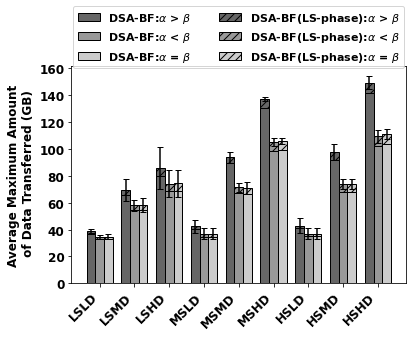

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter

# === LOAD CSV FILES ===
root_directory = r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC'
df_realloc = pd.read_csv(os.path.join(root_directory, 'combined_data_test_sharing3_new.csv'))
df_transfer = pd.read_csv(os.path.join(root_directory, 'combined_data_test_sharing4_fig6.csv'))

# === CATEGORY LABELS ===
category_abbreviations = {
    '1.low-sharing-low-demand': 'LSLD', '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD', '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD', '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD', '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
df_realloc['Category'] = df_realloc['Category'].map(category_abbreviations)
df_transfer['Category'] = df_transfer['Category'].map(category_abbreviations)

# === COLUMNS ===
base_cols = ['avg_BFS_alpha', 'avg_BFS_beta', 'avg_BFS_equal']
base_errs = ['std_BFS_alpha', 'std_BFS_beta', 'std_BFS_equal']
ovr_cols  = ['avg_BFS_dataTransfer_alpha', 'avg_BFS_dataTransfer_beta', 'avg_BFS_dataTransfer_equal']
ovr_errs  = ['std_avg_BFS_dataTransfer_alpha', 'std_avg_BFS_dataTransfer_beta' , 'std_avg_BFS_dataTransfer_equal']

# === LABELS & COLORS ===
labels_base = [r'DSA-BF:$\alpha$ > $\beta$', r'DSA-BF:$\alpha$ < $\beta$', r'DSA-BF:$\alpha$ = $\beta$']
labels_ovr  = [r'DSA-BF(LS-phase):$\alpha$ > $\beta$', r'DSA-BF(LS-phase):$\alpha$ < $\beta$', r'DSA-BF(LS-phase):$\alpha$ = $\beta$']
colors_base = ['0.4', '0.6', '0.8']
hatch_patterns = ['///', '///', '///']



# === PLOT CONFIG ===
x = np.arange(len(df_realloc['Category']))
bar_width = 0.25

# === Y-Axis Formatter for Thousands ===
def thousands(x, pos):
    return '%1.0f' % (x * 1e-3)
formatter = FuncFormatter(thousands)

plt.figure(figsize=(6, 4))

# === PLOT STACKED BARS ===
for i, (bcol, berr, ocol, oerr, col_b, hatch) in enumerate(zip(
    base_cols, base_errs, ovr_cols, ovr_errs, colors_base, hatch_patterns
)):
    xi = x + i * bar_width

    # Bottom bar (base)
    plt.bar(xi,
            df_realloc[bcol],
            width=bar_width,
            color=col_b,
            edgecolor='black')

    # Top bar (overlay)
    combined_std = np.sqrt(df_realloc[berr].values**2 + df_transfer[oerr].values**2)

    plt.bar(xi,
            df_transfer[ocol],
            width=bar_width,
            bottom=df_realloc[bcol].values,
            color=col_b,
            hatch=hatch,
            edgecolor='black',
            yerr=combined_std,
            capsize=3,
            zorder=3)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(formatter)

# === AXIS LABELS ===
plt.xticks(x + bar_width, df_realloc['Category'], rotation=45, ha='right', fontweight='bold', fontsize=12)
plt.ylabel('Average Maximum Amount\n of Data Transferred (GB)', fontweight='bold', fontsize=12)
plt.yticks(fontweight='bold', fontsize=12)

# === LEGEND (2 aligned columns: base and overlay) ===
legend_handles = []
for i in range(len(labels_base)):
    base_patch = Patch(facecolor=colors_base[i], edgecolor='black', label=labels_base[i])
    overlay_patch = Patch(facecolor=colors_base[i], edgecolor='black', hatch=hatch_patterns[i], label=labels_ovr[i])
    legend_handles.append((base_patch, overlay_patch))

# Flatten for 2-column legend
handles_col1 = [pair[0] for pair in legend_handles]
handles_col2 = [pair[1] for pair in legend_handles]
combined_handles = handles_col1 + handles_col2
combined_labels = labels_base + labels_ovr

plt.legend(combined_handles,
           combined_labels,
           loc='upper center',
           bbox_to_anchor=(0.5, 1.3),
           frameon=True,
           ncol=2,
           columnspacing=2.5,
           handletextpad=0.8,
           prop={'weight': 'bold', 'size': 11})

# === FINALIZE ===
output_csv_file_fig5_sharing = os.path.join(root_directory, 'fig6_sharing_new.csv')
df_transfer.to_csv(output_csv_file_fig5_sharing)  # Fix: previously undefined 'df'
plt.savefig(r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\final_result_figure6b.pdf', dpi=300, bbox_inches='tight')
plt.show()

## Below script is for reallocation and non sharing case

In [14]:
df = max_values_df.copy()
columns_to_sum_BFS_alpha_reallocation = [
    '500-1_BFS_Reallocation_alpha_1', 
    '500-2_BFS_Reallocation_alpha_1', 
    '500-3_BFS_Reallocation_alpha_1'
]

 
df['sum_BFS_alpha_reallocation'] = df[columns_to_sum_BFS_alpha_reallocation].sum(axis=1)


columns_to_sum_BFS_beta_reallocation = [
     '500-1_BFS_Reallocation_beta_1', 
    '500-2_BFS_Reallocation_beta_1', 
    '500-3_BFS_Reallocation_beta_1'
]
df['sum_BFS_beta_reallocation'] = df[columns_to_sum_BFS_beta_reallocation].sum(axis=1)


columns_to_sum_BFS_equal_reallocation = [
     '500-1_BFS_Reallocation_equal_1', 
    '500-2_BFS_Reallocation_equal_1', 
    '500-3_BFS_Reallocation_equal_1'
]
df['sum_BFS_equal_reallocation'] = df[columns_to_sum_BFS_equal_reallocation].sum(axis=1)

#################################################################################

columns_to_sum_BF_alpha = [
    '500-1_BF-Online-Sharing-Oblivious-alpha_1',
    '500-2_BF-Online-Sharing-Oblivious-alpha_1', 
    '500-3_BF-Online-Sharing-Oblivious-alpha_1'
]
df['sum_BF_alpha'] = df[columns_to_sum_BF_alpha].sum(axis=1)



columns_to_sum_BF_beta = [
    '500-1_BF-Online-Sharing-Oblivious-beta_1',
    '500-2_BF-Online-Sharing-Oblivious-beta_1', 
    '500-3_BF-Online-Sharing-Oblivious-beta_1'
]
df['sum_BF_beta'] = df[columns_to_sum_BF_beta].sum(axis=1)



columns_to_sum_BF_equal = [
    '500-1_BF-Online-Sharing-Oblivious-equal_1',
    '500-2_BF-Online-Sharing-Oblivious-equal_1', 
    '500-3_BF-Online-Sharing-Oblivious-equal_1'
]
df['sum_BF_equal'] = df[columns_to_sum_BF_equal].sum(axis=1)


####################################################################################
df['x_over_y_BF_alpha_reallocation'] = df['sum_BFS_alpha_reallocation']/df['sum_BF_alpha']
df['x_over_y_BF_beta_reallocation'] = df['sum_BFS_beta_reallocation']/df['sum_BF_beta']
df['x_over_y_BF_equal_reallocation'] = df['sum_BFS_equal_reallocation']/df['sum_BF_equal']
#####
df['t1_BF_alpha_reallocation'] = (df['500-1_BF-Online-Sharing-Oblivious-alpha_1']-df['500-1_BFS_Reallocation_alpha_1'])/df['500-1_BF-Online-Sharing-Oblivious-alpha_1']
df['t2_BF_alpha_reallocation'] = (df['500-2_BF-Online-Sharing-Oblivious-alpha_1']-df['500-2_BFS_Reallocation_alpha_1'])/df['500-2_BF-Online-Sharing-Oblivious-alpha_1']
df['t3_BF_alpha_reallocation'] = (df['500-3_BF-Online-Sharing-Oblivious-alpha_1']-df['500-3_BFS_Reallocation_alpha_1'])/df['500-3_BF-Online-Sharing-Oblivious-alpha_1']

columns_to_sum_t_BF_alpha_reallocation = ['t1_BF_alpha_reallocation','t2_BF_alpha_reallocation','t3_BF_alpha_reallocation']
df['t_avg_BF_alpha_reallocation'] = (df[columns_to_sum_t_BF_alpha_reallocation].sum(axis=1))/3
df['t_std_BF_alpha_reallocation'] = df[columns_to_sum_t_BF_alpha_reallocation].std(axis=1)
######

df['t1_BF_beta_reallocation'] = (df['500-1_BF-Online-Sharing-Oblivious-beta_1']-df['500-1_BFS_Reallocation_beta_1'])/df['500-1_BF-Online-Sharing-Oblivious-beta_1']
df['t2_BF_beta_reallocation'] = (df['500-2_BF-Online-Sharing-Oblivious-beta_1']-df['500-2_BFS_Reallocation_beta_1'])/df['500-2_BF-Online-Sharing-Oblivious-beta_1']
df['t3_BF_beta_reallocation'] = (df['500-3_BF-Online-Sharing-Oblivious-beta_1']-df['500-3_BFS_Reallocation_beta_1'])/df['500-3_BF-Online-Sharing-Oblivious-beta_1']

columns_to_sum_t_BF_beta_reallocation = ['t1_BF_beta_reallocation','t2_BF_beta_reallocation','t3_BF_beta_reallocation']
df['t_avg_BF_beta_reallocation'] = (df[columns_to_sum_t_BF_beta_reallocation].sum(axis=1))/3
df['t_std_BF_beta_reallocation'] = df[columns_to_sum_t_BF_beta_reallocation].std(axis=1)


df['t1_BF_equal_reallocation'] = (df['500-1_BF-Online-Sharing-Oblivious-equal_1']-df['500-1_BFS_Reallocation_equal_1'])/df['500-1_BF-Online-Sharing-Oblivious-equal_1']
df['t2_BF_equal_reallocation'] = (df['500-2_BF-Online-Sharing-Oblivious-equal_1']-df['500-2_BFS_Reallocation_equal_1'])/df['500-2_BF-Online-Sharing-Oblivious-equal_1']
df['t3_BF_equal_reallocation'] = (df['500-3_BF-Online-Sharing-Oblivious-equal_1']-df['500-3_BFS_Reallocation_equal_1'])/df['500-3_BF-Online-Sharing-Oblivious-equal_1']

columns_to_sum_t_BF_equal_reallocation = ['t1_BF_equal_reallocation','t2_BF_equal_reallocation','t3_BF_equal_reallocation']
df['t_avg_BF_equal_reallocation'] = (df[columns_to_sum_t_BF_equal_reallocation].sum(axis=1))/3
df['t_std_BF_equal_reallocation'] = df[columns_to_sum_t_BF_equal_reallocation].std(axis=1)

In [15]:
output_csv_file_reallocation3_new = os.path.join(root_directory, 'combined_data_test_reallocation3_new.csv')
df.to_csv(output_csv_file_reallocation3_new)

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv(output_csv_file_reallocation3)  # Ensure that df is defined and loaded with your dataset

# Replace category names with abbreviations
category_abbreviations = {
    '1.low-sharing-low-demand': 'LSLD',
    '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD',
    '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD',
    '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD',
    '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
data['Category'] = data['Category'].map(category_abbreviations)

# Data for bar chart and error bars, reordered as per your request
x_over_y_columns = ['x_over_y_BF_alpha_reallocation', 'x_over_y_BF_beta_reallocation', 'x_over_y_BF_equal_reallocation']
std_dev_columns = ['t_std_BF_alpha_reallocation', 't_std_BF_beta_reallocation', 't_std_BF_equal_reallocation']
x_over_y_labels = ['BF-alpha', 'BF-beta', 'BF-equal']  # New order of labels
legend_labels = [r'DSA-BF-LS:$\alpha$ > $\beta$', r'DSA-BF-LS:$\alpha$ < $\beta$', r'DSA-BF-LS:$\alpha$ = $\beta$']

# The x position of bars
barWidth = 0.25
r1 = np.arange(len(data['Category']))

# Set color for grayscale by varying the lightness between 0 and 1
colors = ['0.5', '0.2', '0.8']  # Colors ordered to match the new bar order

# Create the figure and the axes with a specific figure size
plt.figure(figsize=(5, 3.5))

# Add bars for each column
for i, (x_over_y_col, std_dev_col, color, label) in enumerate(zip(x_over_y_columns, std_dev_columns, colors, legend_labels)):
    r = [x + (barWidth * i) for x in r1]
    plt.bar(r, data[x_over_y_col], width=barWidth, color=color, edgecolor='black', yerr=data[std_dev_col], capsize=3, label=label)

# Add xticks on the middle of the group bars
# plt.xlabel('Category', fontweight='bold')
plt.xticks([r + barWidth for r in r1], data['Category'].values, rotation=45, ha='right')

# Y-axis label
plt.ylabel('Average Ratio of Maximum\n Amount of Data Transferred')

# Create legend and place it at the top right without overlapping with the data
#plt.legend()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), frameon=True, shadow=False, ncol=3)

# Adjust the bottom margin to prevent cutting off tick labels
plt.subplots_adjust(bottom=0.15)

# Show the plot
plt.tight_layout()
#root_directory = r'C:\Users\mohse\Documents\Result_TCC'  # Replace with your folder path
output_csv_file_fig5_reallocation = os.path.join(root_directory, 'fig5_reallocation_new.csv')
df.to_csv(output_csv_file_fig5_reallocation)
plt.savefig(r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC\BF_relative_max_data_reallocation_new.pdf', dpi=300)
plt.show()


NameError: name 'output_csv_file_reallocation3' is not defined

## below scripts are for combination of sharing and reallocation

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Define the root directory
root_directory = r'C:\Users\sanaz\DataSharing_BinPacking\Data\Result_TCC'
# Load the data from each CSV file
data_reallocation3 = pd.read_csv(output_csv_file_reallocation3)
data_sharing3 = pd.read_csv(output_csv_file_sharing3)


data = pd.merge(data_reallocation3, data_sharing3, on='Category', suffixes=('_reallocation', '_sharing'))


# Replace category names with abbreviations
category_abbreviations = {
    '1.low-sharing-low-demand': 'LSLD',
    '2.low-sharing-medium-demand': 'LSMD',
    '3.low-sharing-high-demand': 'LSHD',
    '4.medium-sharing-low-demand': 'MSLD',
    '5.medium-sharing-medium-demand': 'MSMD',
    '6.medium-sharing-high-demand': 'MSHD',
    '7.high-sharing-low-demand': 'HSLD',
    '8.high-sharing-medium-demand': 'HSMD',
    '9.high-sharing-high-demand': 'HSHD'
}
data['Category'] = data['Category'].map(category_abbreviations)

# Data for bar chart and error bars
x_over_y_columns = [
    'x_over_y_BF_alpha', 'x_over_y_BF_beta', 'x_over_y_BF_equal',
    'x_over_y_BF_alpha_reallocation', 'x_over_y_BF_beta_reallocation', 'x_over_y_BF_equal_reallocation'
]
std_dev_columns = [
    't_std_BF_alpha', 't_std_BF_beta', 't_std_BF_equal',
    't_std_BF_alpha_reallocation', 't_std_BF_beta_reallocation', 't_std_BF_equal_reallocation'
]


legend_labels = [
    r'DSA-BF:$\alpha$ > $\beta$', r'DSA-BF:$\alpha$ < $\beta$', r'DSA-BF:$\alpha$ = $\beta$',
    r'DSA-BF-LS:$\alpha$ > $\beta$', r'DSA-BF-LS:$\alpha$ < $\beta$', r'DSA-BF-LS:$\alpha$ = $\beta$'
]

# The x position of bars
barWidth = 0.125
r1 = np.arange(len(data['Category']))

# Set color for grayscale by varying the lightness between 0 and 1
colors = ['0.3', '0.4', '0.5', '0.7', '0.8', '0.9']

# Create the figure and the axes with a specific figure size
plt.figure(figsize=(10, 5))

# Add bars for each column
for i, (x_over_y_col, std_dev_col, color, label) in enumerate(zip(x_over_y_columns, std_dev_columns, colors, legend_labels)):
    r = [x + (barWidth * i) for x in r1]
    plt.bar(r, data[x_over_y_col], width=barWidth, color=color, edgecolor='black', yerr=data[std_dev_col], capsize=3, label=label)

# Add xticks on the middle of the group bars
plt.xticks([r + 2.5 * barWidth for r in r1], data['Category'].values, rotation=45, ha='right', fontweight='bold', fontsize=12)

# Y-axis label
plt.ylabel('Average Ratio of Maximum\n Amount of Data Transferred', fontweight='bold', fontsize=12)

# Bold Y-ticks
plt.yticks(fontweight='bold', fontsize=12)

# Create legend and place it above the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), frameon=True, shadow=False, ncol=3, prop={'weight': 'bold', 'size': 12})

# Adjust the bottom margin to prevent cutting off tick labels
plt.subplots_adjust(bottom=0.15)

# Tight layout for better spacing
plt.tight_layout()

output_csv_file_fig5 = os.path.join(root_directory, 'final_result_fig6_old.csv')
df.to_csv(output_csv_file_fig5)

# Save the plot to an accessible path
plt.savefig(os.path.join(root_directory, 'final_result_fig6_old.pdf'), dpi=300)

# Display the plot
plt.show()
